In [1]:
import numpy as np
#This following is so that this will work with Latex, see
#http://bkanuka.com/articles/native-latex-plots/
import matplotlib as mpl
mpl.use('pgf')

In [2]:
def figsize(scale):                                 # I think scale is the size you want it on the page
    fig_width_pt = 433.62001                        # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.0                        # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*golden_mean              # height in inches
    fig_size = [fig_width,fig_height]
    return fig_size

pgf_with_lualatex = {                      # Setup matplotlib to use latex for output
    "pgf.texsystem": "lualatex",           # Change this if using xetex or luatex
    "text.usetex": True,                   # Use LaTeX to write all text
    #Fonts
    "font.family": "serif",                # Get from the pdf font function on the doc
    "font.serif": "Computer Modern Roman",      
    "font.sans-serif": "Computer Modern Sans serif",
    "font.monospace": [], # Blank entries should cause plots to inherit fonts from the document
    #Text size
    "font.size": 11,# Document default is 11pt font.
    #"text.fontsize": 11,
    "axes.labelsize": 11,
    "legend.fontsize": 8,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    ##Axis
    #"axes.labelpad": 2,     # space between label and axis 
    "figure.figsize": figsize(1.0),     # default fig size of 1.0 textwidth
    #Packages
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        r"\usepackage{amsmath}",  #need to add math or the ^ won't work
        r"\usepackage{amssymb}"]
    }

mpl.rcParams.update(pgf_with_lualatex)

In [3]:
import pandas as pd
import matplotlib.pyplot as pp
import seaborn as sns
from scipy import interpolate

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [4]:
%matplotlib inline
pp.style.use('seaborn-ticks')
sns.set_palette("muted")

In [5]:
data = pd.read_csv('data/Horowitz_Al_Calculation.csv')

In [6]:
data.head()

,theta,q,sigDWsig2,apv,apv_xi05,apv_xi15
0,4.0,0.410312,264.05032,5.839673e-07,5.840293e-07,5.838640e-07
1,4.1,0.420565,232.93959,6.134834e-07,6.135558e-07,6.133625e-07
2,4.2,0.430818,205.83888,6.437072e-07,6.437918e-07,6.435664e-07
3,4.3,0.441071,182.17815,6.746490e-07,6.747472e-07,6.744853e-07
4,4.4,0.451324,161.46741,7.062982e-07,7.064121e-07,7.061085e-07


In [7]:
# Define constants
hbar_c = 0.1973269788 # [GeV fm] PDG 2016

In [8]:
data['q2'] = np.square(data.q*hbar_c)
data['dapv'] = np.gradient(data.apv)/np.gradient(data.q2)

In [9]:
data.tail()

,theta,q,sigDWsig2,apv,apv_xi05,apv_xi15,q2,dapv
115,15.500025,1.585439,0.002150,0.000008,0.000008,0.000007,0.097875,0.000142
116,15.600025,1.595604,0.002134,0.000008,0.000008,0.000007,0.099134,0.000137
117,15.700026,1.605769,0.002112,0.000008,0.000009,0.000007,0.100401,0.000133
118,15.800026,1.615932,0.002085,0.000008,0.000009,0.000008,0.101676,0.000128
119,15.900026,1.626094,0.002054,0.000008,0.000009,0.000008,0.102959,0.000127


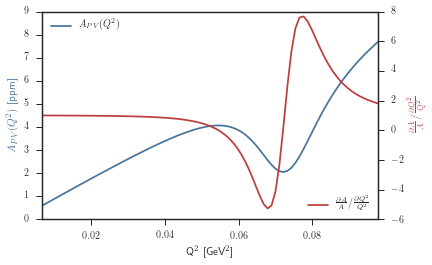

In [13]:
fig, ax1 = pp.subplots(figsize=figsize(1))
pp.tick_params(top=False)
ax2 = ax1.twinx()
ax1.plot(data.q2, data.apv*1e6, color=sns.xkcd_rgb['dull blue'], label='$A_{PV}(Q^{2})$')
ax2.plot(data.q2, data.dapv*(data.q2/data.apv), color=sns.xkcd_rgb['dull red'], label='$\\frac{\partial A}{A}/\\frac{\partial Q^{2}}{Q^{2}}$')
ax1.set_xlabel('Q$^{2}$ [GeV$^{2}$]')
ax1.set_xlim(0.006555, 0.097875)
ax1.set_ylabel('$A_{PV}(Q^{2})$ [ppm]', color=sns.xkcd_rgb['dull blue'])
ax2.set_ylabel('$\\frac{\partial A}{A}/\\frac{\partial Q^{2}}{Q^{2}} $', color=sns.xkcd_rgb['dull red'])
ax1.legend(loc='upper left')
ax2.legend(loc='lower right')
pp.savefig('plots/al_r_q2_slope.png', bbox_inches='tight')
pp.savefig('plots/al_r_q2_slope.pdf', bbox_inches='tight')
pp.savefig('plots/al_r_q2_slope.pgf', bbox_inches='tight')
pp.show()

In [10]:
apv_fun = interpolate.interp1d(data.q2, data.apv)
dapv_fun = interpolate.interp1d(data.q2, data.dapv)
slope = interpolate.interp1d(data.q2, data.dapv*(data.q2/data.apv))
apv_theta = interpolate.interp1d(data.theta, data.apv)

In [15]:
slope(0.023522)

array(0.9707585262718431)

In [11]:
apv_theta(7.5706)

array(2.0632478756814157e-06)

In [12]:
apv_fun(0.023522)

array(2.0686724201080303e-06)